# Osciladores Acoplados

En un sistema de tres resortes acotados en las orillas y unidos por dos masas se describre por la siguiente ecuación de la energía:

\begin{equation}E=\frac{1}{2}\frac{p_1^2}{m_1}+\frac{1}{2}\frac{p_2^2}{m_2}+\frac{1}{2}k_1 x_1^2+\frac{1}{2}k_2(x_2-x_1)^2+\frac{1}{2}k_3 x_2^2\end{equation}

Notemos además que

\begin{equation}  \frac{\partial E}{\partial p_i}=\dot x_i   \land -\frac{\partial E}{\partial x_i}=\dot p_i \end{equation}

en donde

\begin{eqnarray}
\dot p_1 = -k_1 x_1 + k_2(x_2-x_1) &\land& \dot x_1 = \frac{p_1}{m_1}\\
\dot p_2 = -k_3 x_2 - k_2(x_2-x_1) &\land& \dot x_2 = \frac{p_2}{m_2}
\end{eqnarray}

y desarrollando aún más

\begin{eqnarray}
\dot x_1 = \frac{p_1}{m_1} &\land& \dot p_1 = -(k_1+k_2)x_1+k_2 x_2\\
\dot x_2 = \frac{p_2}{m_2}&\land& \dot p_2= k_2 x_1-(k_2+k_3)x_2
\end{eqnarray}

In [2]:
from math import*
from numpy import*
from scipy import*
from scipy.integrate import*
from pylab import*
%matplotlib inline

La función arrojará els siguiente vector $X=[x_1,x_2,p_1,p_2]$

In [3]:
def osciladores(x,t,m1=1.,m2=2.,k1=1.,k2=1.,k3=1.):
    campo = [ x[2]/m1, x[3]/m2 , -(k1+k2)*x[0]+k2*x[1],k2*x[0]-(k2+k3)*x[1] ]
    return campo

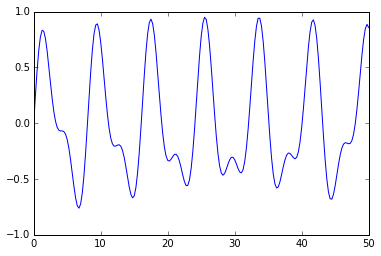

In [30]:
tiempo=linspace(0,500,2000)
cond_ini= [ 0., 0.,1., 1. ]
solucion = odeint(osciladores,cond_ini,tiempo)

xlim(0,50)
plot(tiempo, solucion[:,0])

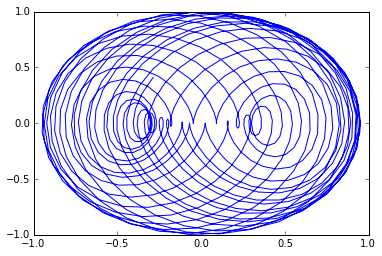

In [17]:
#Este es el esatdo fase del sistema aunque es sólo la proyección en R2. EL chido vive e R4
plot(solucion[:,0],solucion[:,2])

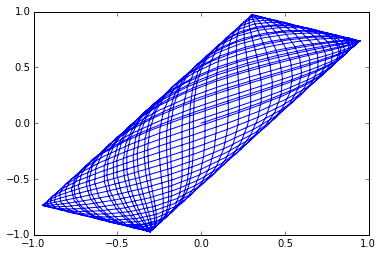

In [18]:
plot(solucion[:,0],solucion[:,1])

Transfromada de Fourier (rfft)

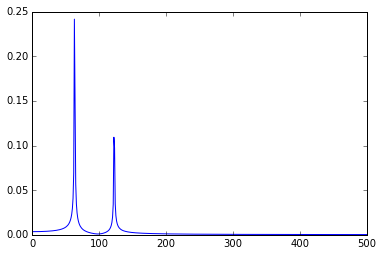

In [38]:
trans = abs(rfft(array(solucion[:,0]))/len(solucion[:,0]))
xlim(0,500)

plot(trans)

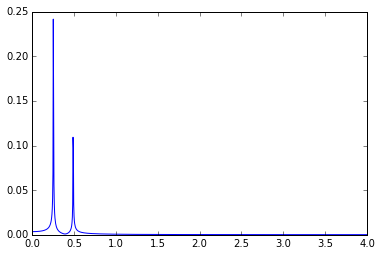

In [40]:

delta_t = tiempo[1]-tiempo[0]
omega = linspace(0, 1./delta_t , len(solucion[:,0])/2+1) 

plot(omega,trans)